In [1]:
import os, glob, random
import pandas as pd
import SimpleITK as sitk
import numpy as np
from scripts_img_process.kidney_seg_to_length import get_lateral_length_from_mask, get_image_path_by_id


In [4]:
df_init = pd.DataFrame()

manual_seg_dir =  'nnUNet_raw_data_base/nnUNet_raw_data/label_in_nii_train526_kito/'
auto_seg_dir = 'nnUNet_raw_data_base/nnUNet_raw_data/label_in_nii_train526_kito/'
csv_write_path= 'nnUNet_raw_data_base/nnUNet_raw_data/kidney_length.csv'


for idx, d in sorted(enumerate(os.listdir(manual_seg_dir))):
    if '.nii.gz' in d :
        print(d,'processing')
        indices = [i for i, c in enumerate(d) if c == '_']
        pid = d[:indices[1]]

        auto_seg_path = get_image_path_by_id(pid, auto_seg_dir)
        manual_seg_path = get_image_path_by_id(pid, manual_seg_dir)

        if os.path.exists(auto_seg_path) and os.path.exists(manual_seg_path)  :
            manual_seg_sitk = sitk.ReadImage(manual_seg_path)
            mskCube  = sitk.GetArrayFromImage(manual_seg_sitk)
            auto_seg_sitk = sitk.ReadImage(auto_seg_path)
            prdCube = sitk.GetArrayFromImage(auto_seg_sitk)
            
            mskCube_right = mskCube.copy()
            mskCube_right[mskCube == 2] =0  # right kidney is left   
            length_right_gd, len_rgd_cord0,len_rgd_cord1 = get_lateral_length_from_mask(mskCube_right)
            
            mskCube_left = mskCube.copy()
            mskCube_left[mskCube == 1] =0  # left kidney is left  
            length_left_gd, len_lgd_cord0,len_lgd_cord1 = get_lateral_length_from_mask(mskCube_left)

            prdCube_right = prdCube.copy()
            prdCube_right[prdCube==2] =0  # right kidney is left 
            length_right_ai, len_rai_cord0,len_rai_cord1 = get_lateral_length_from_mask(prdCube_right)

            prdCube_left = prdCube.copy()
            prdCube_left[prdCube==1] =0  # left kidney is left  
            length_left_ai, len_lai_cord0,len_lai_cord1 = get_lateral_length_from_mask(prdCube_left)
           

            df = pd.DataFrame({'CT_id':  pid,

                        'length_right_gd':round(length_left_gd,5), 'length_right_ai':round(length_left_ai,5),             
                               
                        'length_left_gd':round(length_right_gd,5),'length_left_ai':round(length_right_ai,5),

                        'len_rgd_cord0': str(len_rgd_cord0),  'len_rai_cord0': str(len_rai_cord1),                               
                        'len_rgd_cord1': str(len_rgd_cord1) ,  'len_rai_cord1': str(len_rai_cord1),                     
                                                      
                        'len_lgd_cord0': str(len_lgd_cord0),  'len_lai_cord0': str(len_lai_cord0),
                        'len_lgd_cord1': str(len_lgd_cord1),  'len_lai_cord1': str(len_lai_cord1)
                            },index=[0])
            df_init = df_init.append(df)
            df_init.to_csv(csv_write_path )
            print(idx,'th',pid,'\n\n')


Colon_001_kidney_2class_label_seg_kito.nii.gz processing
94.56214887575261
94.7100839404126
94.56214887575261
94.7100839404126
0 th Colon_001 




In [3]:
print(str(len_lai_cord1))

[249. 267.  79.]


In [5]:
csv_write_path=csv_write_path
# csv_write_path= 'csv/nnunet_length_colon_ts_78.csv'
# csv_write_path= 'csv/nnunet_length_plain_CT_285.csv'
df_init = pd.read_csv(csv_write_path, index_col = False)

print(df_init.shape)

df_init.head()

(1, 14)


,Unnamed: 0,CT_id,length_right_gd,length_right_ai,length_left_gd,length_left_ai,len_rgd_cord0,len_rai_cord0,len_rgd_cord1,len_rai_cord1,len_lgd_cord0,len_lai_cord0,len_lgd_cord1,len_lai_cord1
0,0,Colon_001,94.71008,94.71008,94.56215,94.56215,[133. 238. 65.],[172. 252. 82.],[172. 252. 82.],[172. 252. 82.],[268. 220. 63.],[268. 220. 63.],[249. 267. 79.],[249. 267. 79.]


col_show is length_right_ai
col_show is length_right_ai
col_show is length_right_ai
length_right_ai shape: (1,) mean: 94.7101 std: 0.0


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

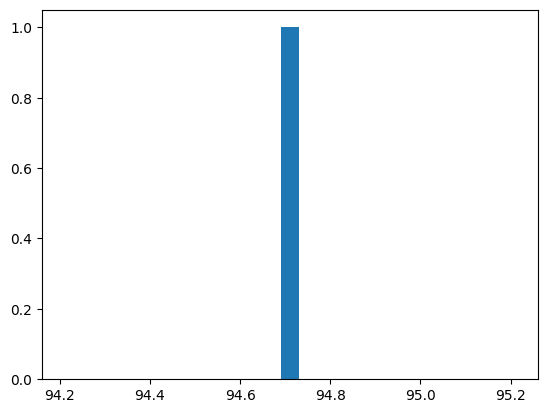

In [6]:
import matplotlib.pyplot as plt
idx = 3
col_show = list(df_init)[idx]
# col_show = 'dice_score'
print('col_show is', col_show )
print('col_show is', col_show )
print('col_show is', col_show )
value_mean = round(np.mean(df_init[col_show]),4)
value_std = round(np.std(df_init[col_show]),4)
shape = df_init[col_show ].shape


print(col_show, 'shape:',shape, 'mean:' ,value_mean,'std:', value_std)
plt.hist( df_init[col_show],bins = 25)
plt.imshow

558 558
length_right_gd length_right_ai 
 ks_p_value 0.43858213461633094  NS NS NS 



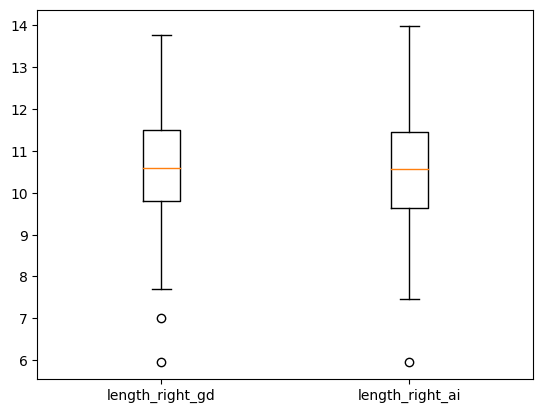

In [19]:
from scipy import stats
import matplotlib.pyplot as plt
                    
col = ['length_right_gd','length_right_ai']
# col = ['length_left_gd','length_left_ai']

ai_vol = list(df_init[col[0]])
gd_vol  = list(df_init[col[1]])

ai_vol = list(df_init['length_right_ai']) + list(df_init['length_left_ai'])
gd_vol  = list(df_init['length_right_gd']) + list(df_init['length_left_gd'])

print(len(ai_vol), len(gd_vol))
cor = stats.spearmanr(ai_vol , gd_vol)[0]
#             print(col_x, col_y, 'cor',cor)
ks_s, ks_p = stats.ks_2samp(ai_vol,gd_vol)
if ks_p >0.05:
    print(col[0], col[1], '\n', 'ks_p_value',ks_p,' NS NS NS \n')
if ks_p <=0.05:
    print(col[0], col[1], '\n', 'ks_p_value',ks_p,' Significant \n')

plt.boxplot((ai_vol,gd_vol,),labels=(col))
# plt.ylim(100,800)
plt.show()
